In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/extended_featured_data.csv')

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR,NEW_noProt,NEW_Engaged,NEW_Young_Not_Engaged,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_TotalServices,NEW_AVG_Service_Fee
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0-1 Year,0,0,1,0,0,1,14.925000
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,2-3 Year,0,1,0,0,0,2,18.983333
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0-1 Year,0,0,1,0,0,2,17.950000
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,3-4 Year,0,1,0,0,0,3,10.575000
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0-1 Year,1,0,1,0,0,0,70.700000


In [19]:
X = df.drop(columns = ['Churn','NEW_TENURE_YEAR'])
y = df['Churn'].values

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

In [21]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_noProt,NEW_Engaged,NEW_Young_Not_Engaged,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_TotalServices,NEW_AVG_Service_Fee
0,0,0,1,0,1,0,1,29.85,29.85,1,...,0,1,0,0,0,1,0,0,1,14.925000
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,1,0,1,0,0,0,2,18.983333
2,1,0,0,0,2,1,1,53.85,108.15,0,...,0,0,1,0,0,1,0,0,2,17.950000
3,1,0,0,0,45,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,3,10.575000
4,0,0,0,0,2,1,1,70.70,151.65,0,...,0,1,0,1,0,1,0,0,0,70.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,1,0,6,12.114286
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,1,0,0,0,1,0,1,1,5,17.200000
7040,0,0,1,1,11,0,1,29.60,346.45,1,...,0,1,0,1,0,1,0,0,1,14.800000
7041,1,1,1,0,4,1,1,74.40,306.60,0,...,0,0,1,1,0,0,0,0,1,37.200000


In [22]:
y

array([0, 0, 1, ..., 0, 1, 0], shape=(7043,))

Spliting data 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [24]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

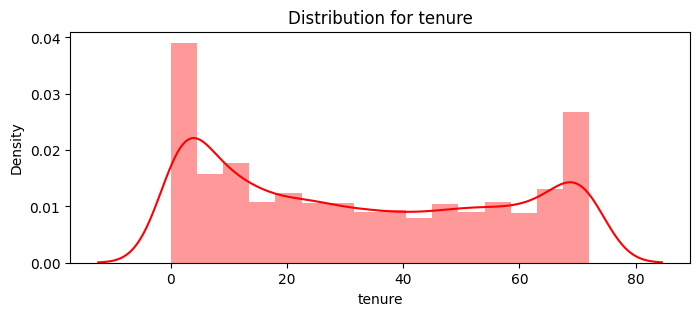

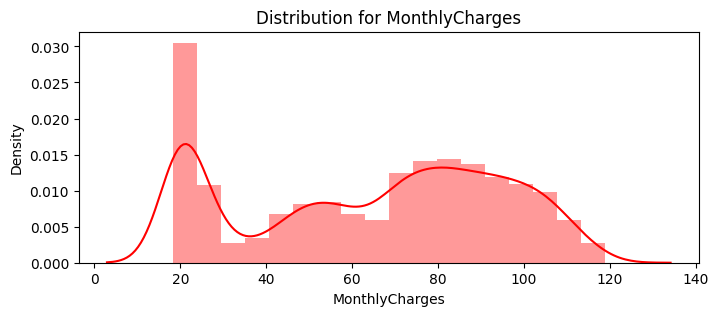

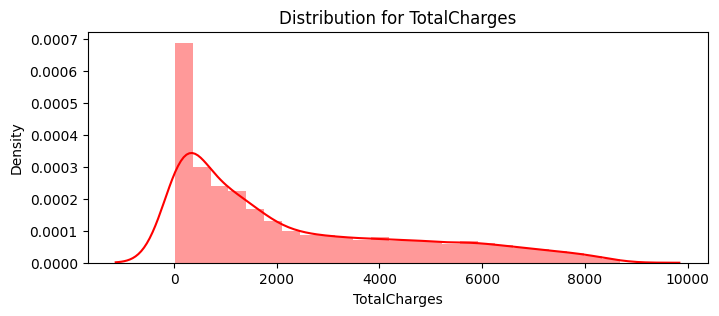

In [25]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [26]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Decision Tree Classifier


In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7198296261239944


In [28]:
print(classification_report(y_test, predictdt_y))


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1552
           1       0.47      0.50      0.48       561

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113

